# Open H5 data sets


This notebook shows how to access .h5 files. First we import all necessary packages. 

In [1]:
import h5py
from utils import *

## SKIRT

We assume that the .h5 files for the SKIRT images are stored as follows

In [2]:
FILE_SKIRT_GENERATED = '/mnt/data/tum_bib_upload/galaxies-metrics-denoising/final/SKIRT_StyleGAN.h5'
FILE_SKIRT_TRAINING = '/mnt/data/ALAE-TNG/v2/TNG_channel_a128_sdss99r0.h5'
FILE_SKIRT_TRAINING = '/mnt/data/denoising/TNG_channel_a64_sdss99_full_r0.h5'

First we will visualize the training data set using `make_lupton_rgb` from `astropy.visualization` 

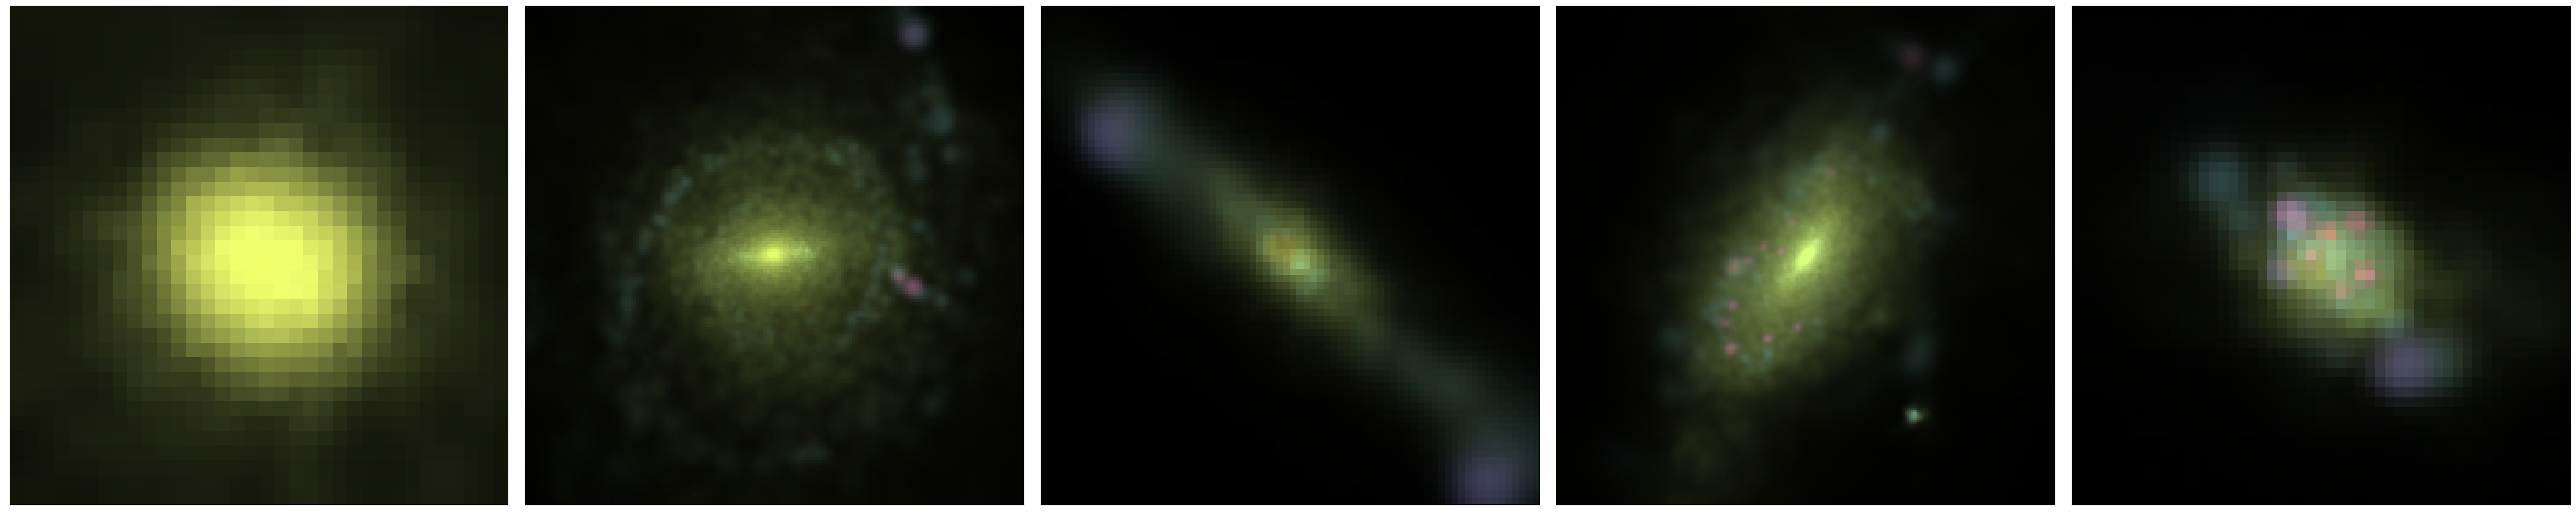

In [3]:
show_gallery(FILE_SKIRT_TRAINING, transform=False, rows = 1)

Then, we also visualize the data generated by our StyleGAN model

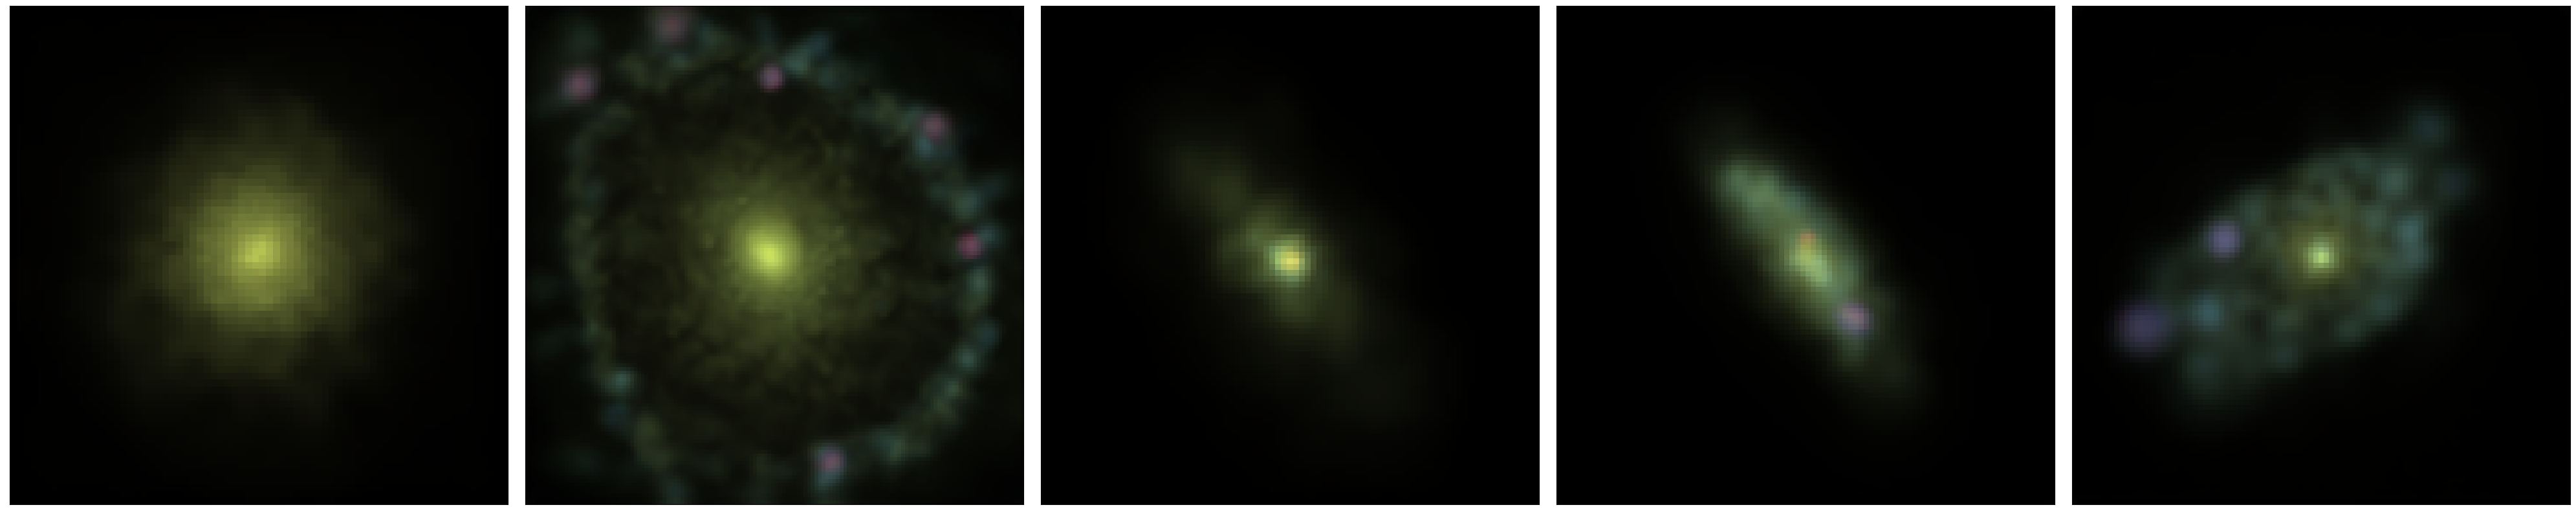

In [4]:
show_gallery(FILE_SKIRT_GENERATED, transform=True, rows = 1)

## Accessing the data file manually

We can open the .h5 file (with the 'r' option for 'read') using the package `h5py` and select individual data samples which are indexed by keys

In [5]:
skirt_generated = h5py.File(FILE_SKIRT_GENERATED, 'r')

To show the first 10 keys (ordered alphabetically), we can do the following

In [6]:
list(skirt_generated.keys())[:10]

['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003', '10004']

In [7]:
len(skirt_generated.keys())

50000

We can select the the data sample belonging to an index just like using any python dictionary

In [8]:
skirt_generated['0']

<HDF5 group "/0" (3 members)>

The above message tells us that the key '0' links to a group with 3 members. We can print the names of the members

In [9]:
skirt_generated['0'].keys()

<KeysViewHDF5 ['data', 'w_space', 'z_space']>

The members store the following information: <ol>
    <p> '*data*'   : an array of size 256 $\times$ 256 $\times$ 5 and the first 4 channels are the filter g, r, i and z. 
        </br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The fifth channel is constant and encodes the physical size of the galaxy </p> 
    <p> '*w_space*': an array of size 512 that is the latent representation (W-representation) of the data </p>   
    <p> '*z_space*': an array of size 512 that is the latent representation (Z-representation) of the data </p>   
</ol>
The size encoding channel can be converted to the actual physical size using the function TODO. Moreover, the training data set groups do not have a 'w_space' and 'z_space' member. </br> </br>
Group members can be converted to NumPy arrays as follows

In [10]:
import numpy as np

data = np.array(skirt_generated['0']['data']).astype(np.float32)
print(f'Shape: {data.shape}, dtype: {data.dtype}')

Shape: (256, 256, 5), dtype: float32


Close the h5 data set at the end

In [15]:
skirt_generated.close()

## COSMOS

The COSMOS data sets can be accessed in the same way as the SKIRT data sets. We first define the locations of the files

In [16]:
FILE_COSMOS_GENERATED = '/mnt/data/tum_bib_upload/galaxies-metrics-denoising/final/COSMOS_StyleGAN.h5'
FILE_COSMOS_TRAINING = '/mnt/data/COSMOS/COSMOS_256_p0.h5'

For the visualization of the training galaxies, we add the parameter *data* with value *'cosmos'* when calling show_gallery()

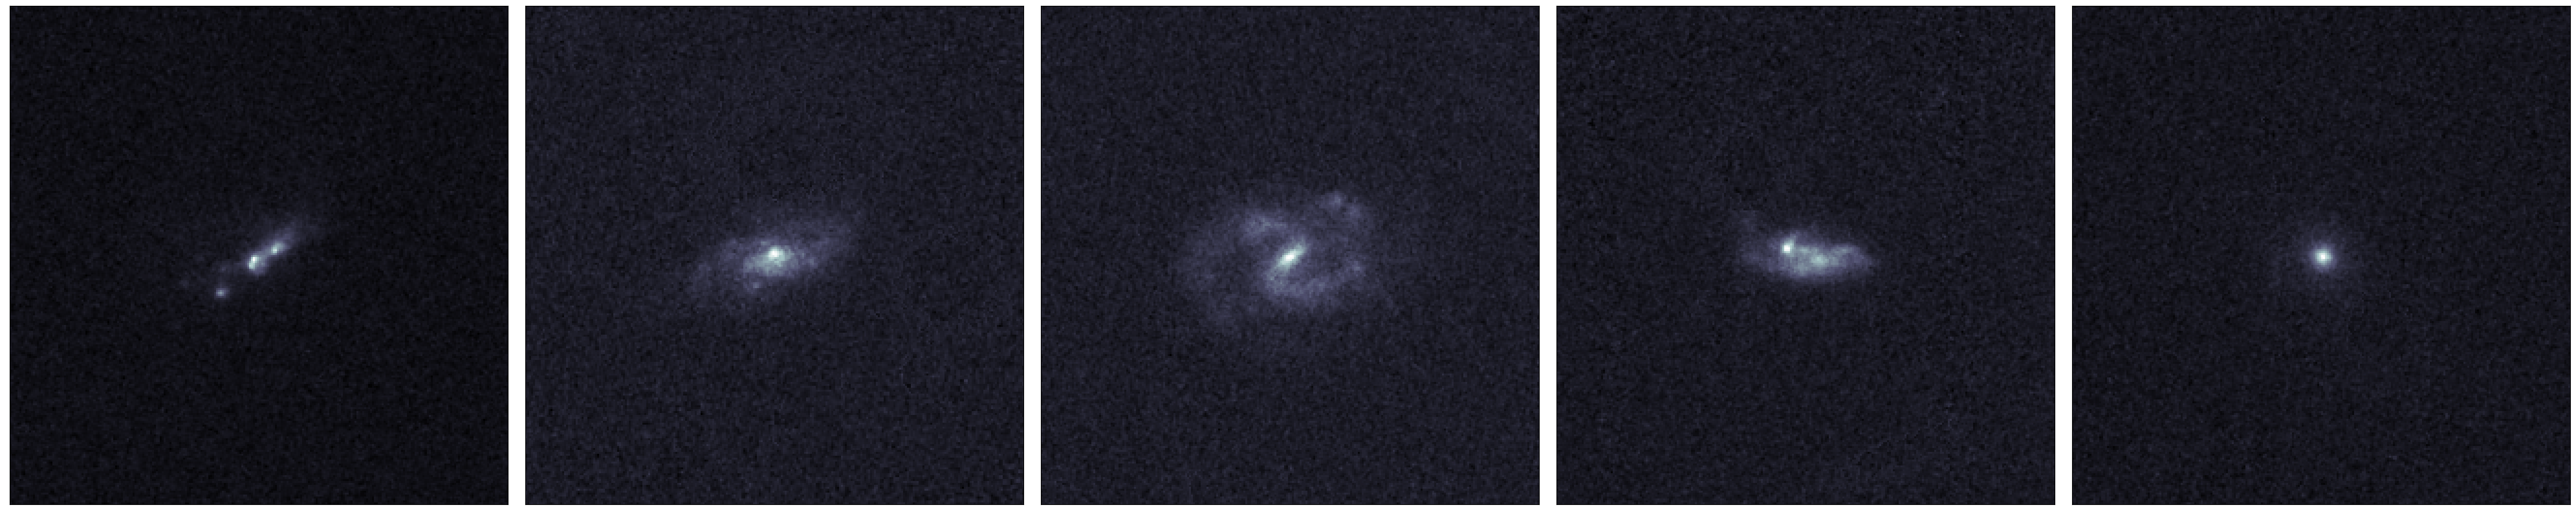

In [17]:
show_gallery(FILE_COSMOS_TRAINING, transform=False, rows = 1, data='cosmos')

Then, we also visualize the data generated by our StyleGAN model

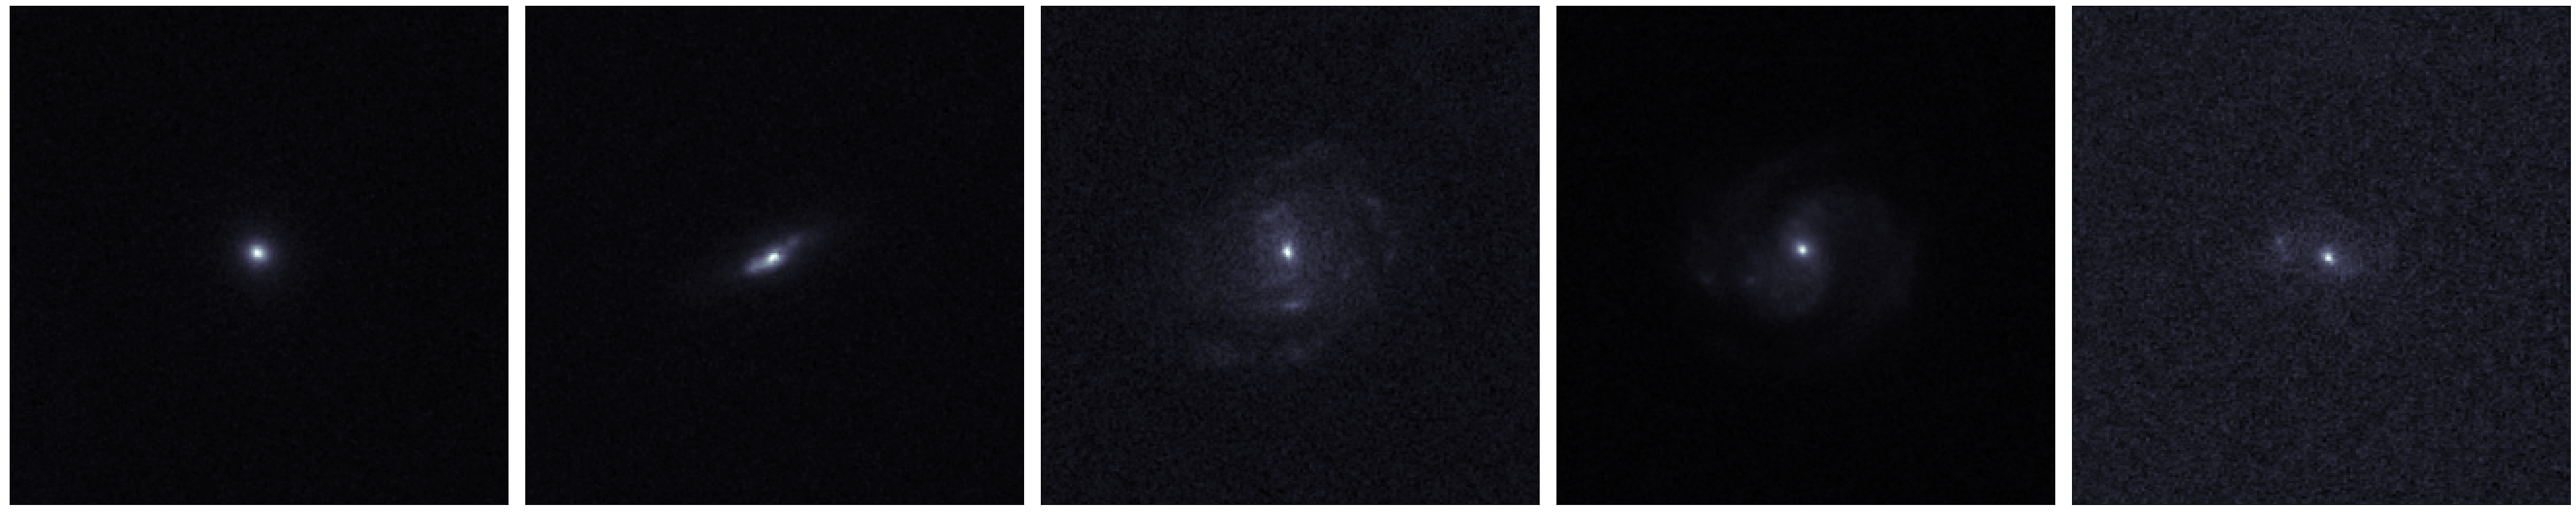

In [18]:
show_gallery(FILE_COSMOS_GENERATED, transform=False, rows = 1, data='cosmos')

In [19]:
cosmos_generated = h5py.File(FILE_COSMOS_GENERATED, 'r')
list(cosmos_generated.keys())[:10]

['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003', '10004']

In [20]:
cosmos_generated['0']['z_space']

<HDF5 dataset "z_space": shape (512,), type "<f4">

## Sérsic profiles 

The Sérsic data sets can be accessed in the same way as the SKIRT data sets as well. We first define the locations of the files

In [21]:
FILE_SERSIC_GENERATED = '/mnt/data/tum_bib_upload/galaxies-metrics-denoising/final/Sersic_StyleGAN.h5'
FILE_SERSIC_TRAINING = '/mnt/data/ALAE-TNG/Sersic/Sersic_mag_22r0.h5'

For the visualization of the training galaxies, we add the parameter data with value 'sersic' when calling show_gallery()

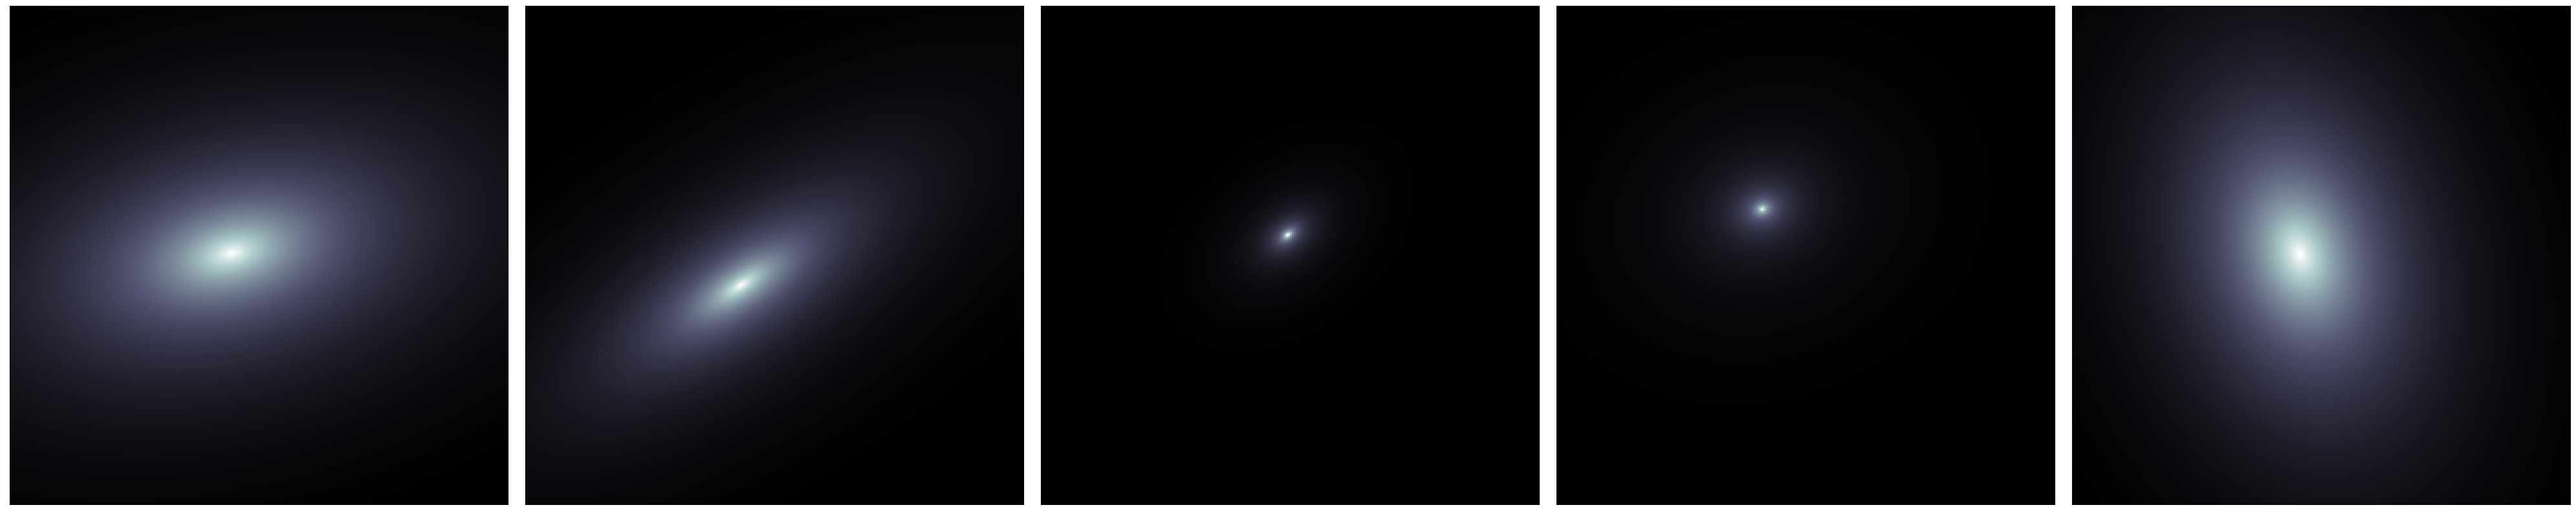

In [22]:
show_gallery(FILE_SERSIC_TRAINING, transform=False, rows = 1, data='sersic')

Then, we also visualize the data generated by our StyleGAN model

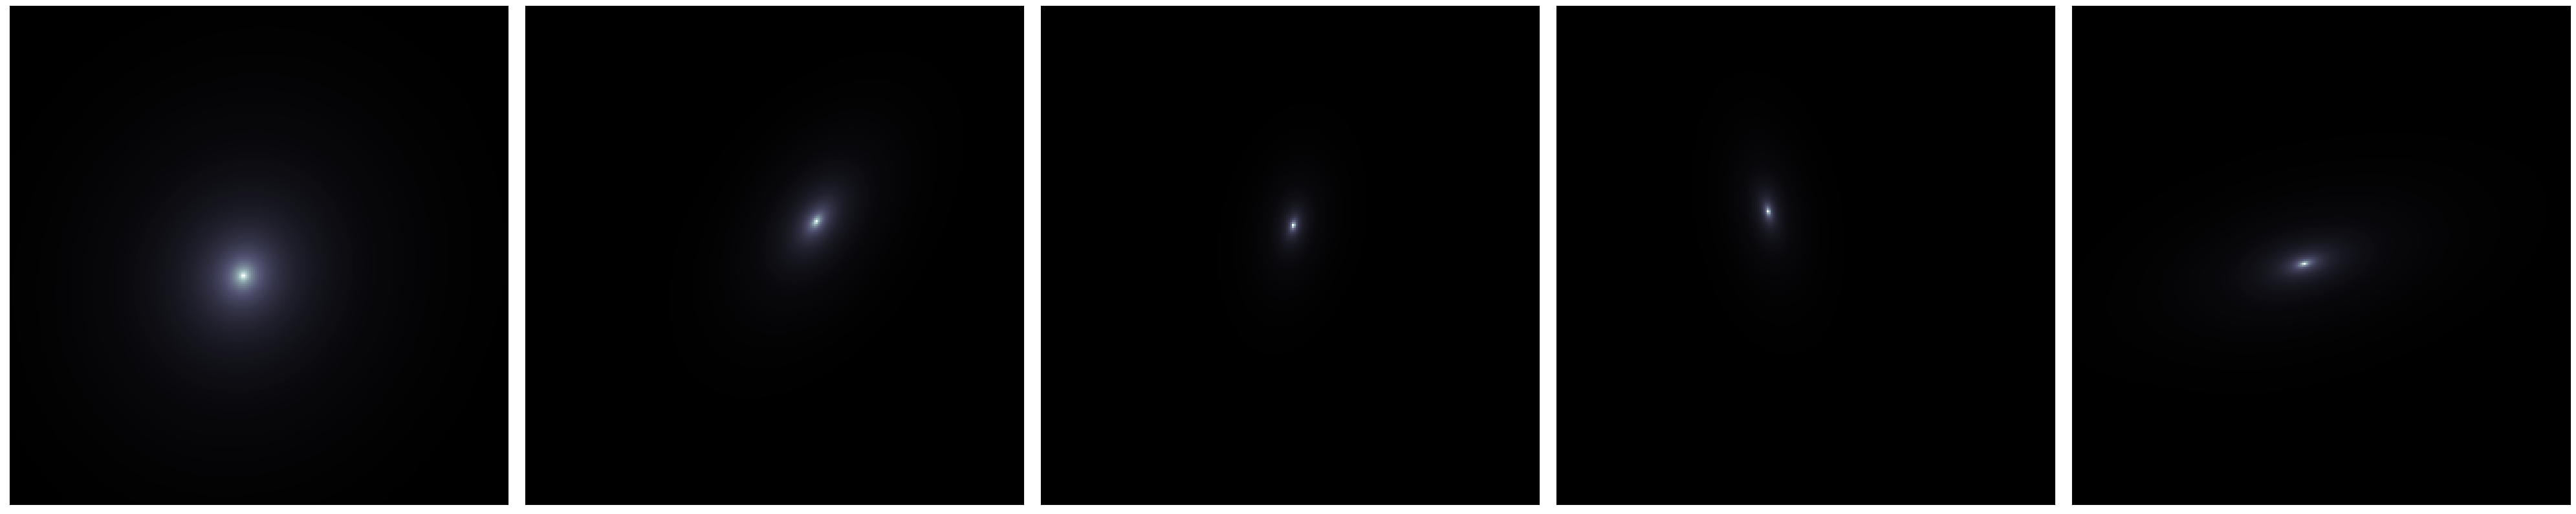

In [23]:
show_gallery(FILE_SERSIC_GENERATED, transform=False, rows = 1, data='sersic')

For the Sérsic profiles training data set, there is an additional group member *'labels'*, which contains all parameters that define the profile

In [24]:
sersic_training = h5py.File(FILE_SERSIC_TRAINING, 'r')
key = list(sersic_training.keys())[0]
parameters = list(sersic_training[key]['labels'])
sersic_training.close()

In [25]:
print(f'x_position: {parameters[0]:.5f},\ny_position: {parameters[1]:.5f},\nradius: {parameters[2]:.5f},',
      f'\nsersic index: {parameters[3]:.5f},\naxis_ratio: {parameters[4]:.5f},\nposition_angle: {parameters[5]:.5f},',
      f'\ntotal_counts: {parameters[6]:.5f}')

x_position: -0.56082,
y_position: -0.03763,
radius: 3.72958, 
sersic index: 1.18910,
axis_ratio: 0.55817,
position_angle: 0.23783, 
total_counts: 252.76709


In [26]:
sersic_generated = h5py.File(FILE_SERSIC_GENERATED, 'r')
list(sersic_generated.keys())[:10]

['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003', '10004']

In [27]:
sersic_generated['0']['w_space']

<HDF5 dataset "w_space": shape (32,), type "<f4">